In [77]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
# Função para buscar os dados da API
def fetch_gutendex_data():
    url = "https://gutendex.com/books"
    response = requests.get(url)
    data = response.json()
    return data['results']

In [79]:
if response.status_code == 200:
    # Sucesso! Os dados estão em nossas mãos!
    print('Dados obtidos com sucesso!')
    dados_json = response.json()
else:
    # Erro! Algo deu errado...
    print(f'Erro na requisição: {response.status_code}')
    exit()


Dados obtidos com sucesso!


In [80]:
# Função para extrair os dados necessários
def extract_relevant_data(data):
    relevant_data = []
    for book in data:
        book_info = {
            'id': book['id'],
            'authors': [author['name'] for author in book['authors']],
            'title': book['title'],
            'languages': book['languages'],
            'download_count': book['download_count']
        }
        relevant_data.append(book_info)
    return relevant_data

In [81]:
# Função principal
def main():
    # Obter dados da API
    books_data = fetch_gutendex_data()
    
    # Extrair dados relevantes
    relevant_data = extract_relevant_data(books_data)
    
    # Converter para DataFrame do pandas
    df = pd.DataFrame(relevant_data)
    
    # Exibir as primeiras linhas do DataFrame
    print(df.head())
    
    # Análise dos Dados
    # Top 10 livros mais baixados
    most_downloaded_books = df.nlargest(10, 'download_count')
    print(most_downloaded_books[['title', 'download_count']])

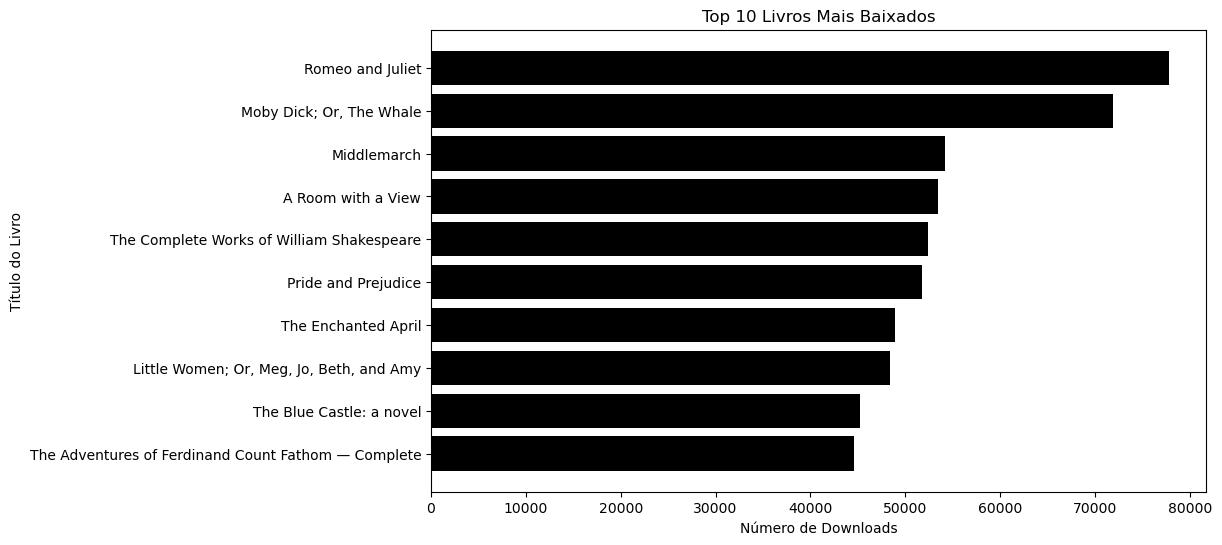

In [82]:
 # Gráfico de barras dos livros mais baixados
plt.figure(figsize=(10, 6))
plt.barh(most_downloaded_books['title'], most_downloaded_books['download_count'], color='black')
plt.xlabel('Número de Downloads')
plt.ylabel('Título do Livro')
plt.title('Top 10 Livros Mais Baixados')
plt.gca().invert_yaxis()
plt.show()